In [ ]:
!git clone https://github.com/prajnasb/observations.git

fatal: destination path 'observations' already exists and is not an empty directory.


#Prerna Bhalla



# Graduate Rotational Internship Program<br>
# The Sparks Foundation <br>
Computer Vision & Internet of Things<br>

Task 4: Detection of face mask <br>


In [ ]:
# Dataset: https://github.com/prajnasb/observations/tree/master/experiements/data    by Prajna Bhandary   # 690 mask and 686 no mask images
# Model Used: MobileNetV2   (transfer learning)

# Mount Drive and Load Libraries

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import random
import shutil

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, MaxPooling2D, Flatten, Dropout, Conv2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import  load_model


In [ ]:
# defining path 


with_mask_path="/content/observations/experiements/data/with_mask/"   # path of with mask images 
without_mask_path="/content/observations/experiements/data/without_mask/"   # path of without mask images 
test_path="/content/Test/"
data_path="/content/observations/experiements/data"


# Visualizing Data

In [ ]:
def plot(mask_list, with_mask_path, num_img,num_rows):
  """
  showing images 
  mask_list= list containing images name
  with_mask_path= path of folder containing those images 
  num_img= number of images to show 
  num_rows= number of rows for image show 
  """

  if num_img%num_rows==0:
       plt.figure(figsize=(10,10))
       j=1
       for i in random.sample(mask_list,num_img):    # random sample containing names of images 
          img= cv2.imread( with_mask_path + i)
          img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
          a=num_rows

  
          plt.subplot(a, int(len(random.sample(mask_list,num_img))/a), j)
          plt.imshow(img)
          plt.title(str(img.shape))
          j+=1

MASK IMAGES:


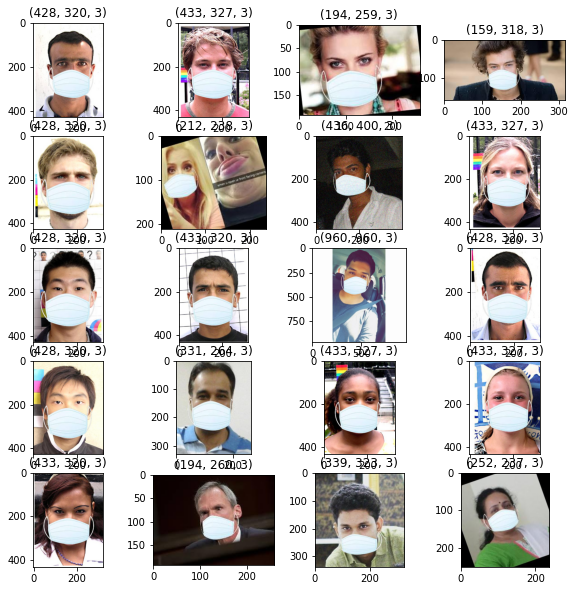

In [ ]:
# visualizing mask and no mask images 

mask_list= sorted(os.listdir(with_mask_path))
no_mask_list=sorted(os.listdir(without_mask_path))

print("MASK IMAGES:")


plot(mask_list, with_mask_path, 20,5)



NO MASK IMAGES:


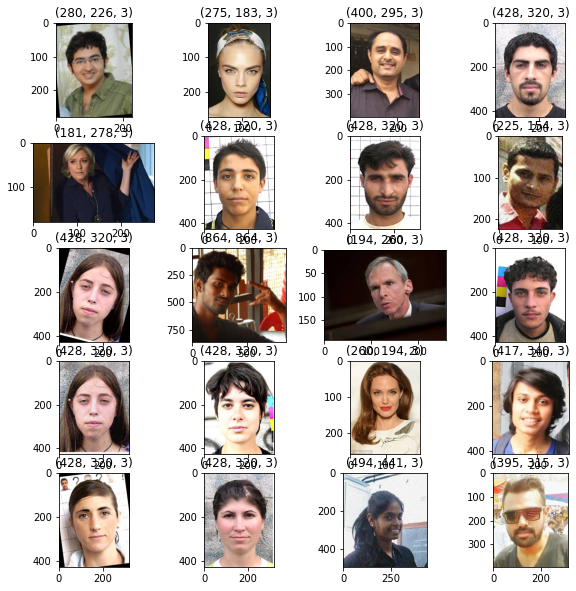

In [ ]:
print("NO MASK IMAGES:")


plot(no_mask_list, without_mask_path, 20,5)


In [ ]:
print ("TOtal Mask Images: ",len(mask_list))
print("Total Non Mask Images: " , len(no_mask_list))

TOtal Mask Images:  690
Total Non Mask Images:  686


# Creating Test Set

In [ ]:
# split data into train and test: 
# 2% data for testing purpose

# creating Test directory
os.mkdir("/content/Test")
os.mkdir(os.path.join("/content/Test/"+"with_mask"))
os.mkdir(os.path.join("/content/Test/"+"without_mask"))

In [ ]:
def move_to_test(mask_list, with_mask_path,a):
    
    """
    a=0: with mask
    a=1 : without mask 
    mask_list= list containing images name 
    with_mask_path= path of folder containing those images 
    """
    num_test=int(np.ceil(len(mask_list)*0.02))   # how many images you want for test from mask_list   ---> abt 2%
    for image in mask_list[-num_test:]:
      if  a==0:  # with mask
          #print(os.path.join(with_mask_path , image),"----", os.path.join(test_path,"with_mask/",image))
          shutil.move(os.path.join(with_mask_path , image),os.path.join(test_path,"with_mask/",image))

      else:   # without mask 
         # print(os.path.join(with_mask_path , image),"----", os.path.join(test_path,"without_mask/",image))
          shutil.move(os.path.join(with_mask_path , image),os.path.join(test_path,"without_mask/",image))


In [ ]:
move_to_test(mask_list, with_mask_path,0)

In [ ]:
move_to_test(no_mask_list, without_mask_path,1)

In [ ]:
 #checking : 

 len(os.listdir(without_mask_path)), len(os.listdir(with_mask_path)), len(os.listdir(test_path+"without_mask")), len(os.listdir(test_path+"with_mask"))

(672, 676, 14, 14)

# Preparing Data

In [ ]:
batch_size=32

train_gen=ImageDataGenerator(horizontal_flip=True, rescale=1/255., validation_split=0.2)
test_gen=ImageDataGenerator(rescale=1/255.)


Train=train_gen.flow_from_directory(data_path, target_size=(224,224), classes=["with_mask", "without_mask"],class_mode="categorical",
                                    batch_size=batch_size,shuffle=True, seed=1, subset="training" 
                                    )

VAl=train_gen.flow_from_directory(data_path, target_size=(224,224), classes=["with_mask", "without_mask"],class_mode="categorical",
                                    batch_size=batch_size,shuffle=True, seed=1, subset="validation" 
                                    )

Test=test_gen.flow_from_directory(test_path, target_size=(224,224), classes=["with_mask", "without_mask"],class_mode="categorical",
                                    batch_size=batch_size,shuffle=True, seed=1 
                                    )

Found 1079 images belonging to 2 classes.
Found 269 images belonging to 2 classes.
Found 28 images belonging to 2 classes.


# Model Building 

In [ ]:
Mobile_net=MobileNetV2(input_shape=(224,224,3),include_top=False, weights="imagenet")
Mobile_net.trainable=False 

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
model=Sequential()
model.add(Mobile_net)
model.add(GlobalAveragePooling2D())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                81984     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 2,340,098
Trainable params: 82,114
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
#mkdir /content/drive/MyDrive/face_mask_detection---> only once 

In [ ]:
model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['acc'])
checkpoint = ModelCheckpoint('/content/drive/MyDrive/face_mask_detection/model.h5',monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='min')
history = model.fit(Train,epochs = 50,validation_data = VAl,callbacks = [checkpoint])

Epoch 1/50
34/34 [==============================] - 8s 162ms/step - loss: 1.2172e-05 - acc: 1.0000 - val_loss: 0.1676 - val_acc: 0.9814

Epoch 00001: val_loss improved from inf to 0.16763, saving model to /content/drive/MyDrive/face_mask_detection/model.h5
Epoch 2/50
34/34 [==============================] - 5s 141ms/step - loss: 3.9181e-05 - acc: 1.0000 - val_loss: 0.0695 - val_acc: 0.9851

Epoch 00002: val_loss improved from 0.16763 to 0.06951, saving model to /content/drive/MyDrive/face_mask_detection/model.h5
Epoch 3/50
34/34 [==============================] - 5s 138ms/step - loss: 1.9542e-06 - acc: 1.0000 - val_loss: 0.1373 - val_acc: 0.9851

Epoch 00003: val_loss did not improve from 0.06951
Epoch 4/50
34/34 [==============================] - 5s 139ms/step - loss: 1.5450e-04 - acc: 1.0000 - val_loss: 0.0060 - val_acc: 0.9926

Epoch 00004: val_loss improved from 0.06951 to 0.00601, saving model to /content/drive/MyDrive/face_mask_detection/model.h5
Epoch 5/50
34/34 [===============

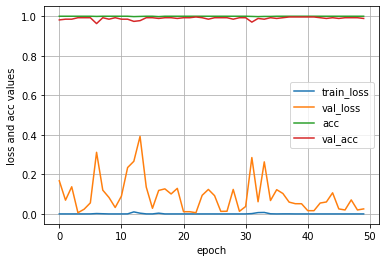

In [ ]:
plt.plot( list(range(len(history.history["loss"]))),history.history["loss"], label="train_loss")
plt.plot( list(range(len(history.history["val_loss"]))),history.history["val_loss"], label="val_loss")
plt.plot( list(range(len(history.history["acc"]))),history.history["acc"], label="acc")
plt.plot( list(range(len(history.history["val_acc"]))), history.history["val_acc"], label="val_acc")
plt.legend()
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss and acc values")
plt.show()
plt.close()

In [ ]:
model.evaluate(Test)

1/1 [==============================] - 1s 1s/step - loss: 5.5683e-06 - acc: 1.0000


[5.568342658079928e-06, 1.0]

In [ ]:
Model=load_model("/content/drive/MyDrive/face_mask_detection/model.h5")